In [ ]:
from google.colab import drive
drive.mount('/sp')

Mounted at /sp


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("interview_dataset.csv")
print(dataset.head(1))

     treatment company    azimuth  md (ft)  tvd (ft) date on production  \
0  treatment company 1 -32.279999    19148    6443.0         03/01/2018   

   month  year    operator  footage lateral length  well spacing  ...  \
0      1  2018  operator 1                 11966.0     4368.4629  ...   

   p-velocity  s-velocity  youngs modulus    isip  breakdown pressure  \
0    13592.23     6950.44           30.82  4149.0                 NaN   

   pump rate  total number of stages  proppant volume  proppant fluid ratio  \
0         83                      56       21568792.0                  1.23   

    production  
0  5614.947951  

[1 rows x 30 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x78629b1313c0>,
 'caps': [<matplotlib.lines.Line2D at 0x78629b131840>,
 'boxes': [<matplotlib.lines.Line2D at 0x78629b131120>],
 'medians': [<matplotlib.lines.Line2D at 0x78629b131d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x78629b132020>],
 'means': []}

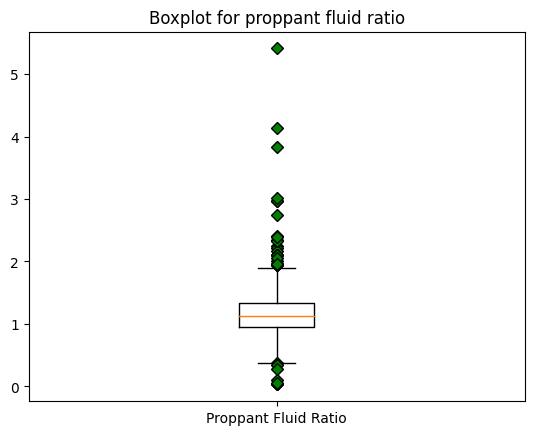

In [ ]:
dataClean = dataset.select_dtypes(np.number).fillna(0) # Fill with Zero NaN values
dataClean = dataClean.reset_index(drop=True)  # Drop all the columns that are not numeric
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot for proppant fluid ratio')
ax.boxplot(dataClean['proppant fluid ratio'], flierprops=green_diamond, labels=["Proppant Fluid Ratio"])

In [ ]:
# Remove outliers
for x in ['proppant fluid ratio']:
    # numpy.percentile() method to calculate the values of Q1 and Q3.
    q75,q25 = np.percentile(dataClean.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dataClean.loc[dataClean[x] < min,x] = np.nan
    dataClean.loc[dataClean[x] > max,x] = np.nan

dataClean.isnull().sum()

azimuth                    0
md (ft)                    0
tvd (ft)                   0
month                      0
year                       0
footage lateral length     0
well spacing               0
porpoise deviation         0
porpoise count             0
shale footage              0
acoustic impedance         0
log permeability           0
porosity                   0
poisson ratio              0
water saturation           0
toc                        0
vcl                        0
p-velocity                 0
s-velocity                 0
youngs modulus             0
isip                       0
breakdown pressure         0
pump rate                  0
total number of stages     0
proppant volume            0
proppant fluid ratio      33
production                 0
dtype: int64

In [ ]:
#dropping the null values using pandas.dataframe.dropna() function
dataClean = dataClean.dropna(axis = 0)
dataClean.isnull().sum()

azimuth                   0
md (ft)                   0
tvd (ft)                  0
month                     0
year                      0
footage lateral length    0
well spacing              0
porpoise deviation        0
porpoise count            0
shale footage             0
acoustic impedance        0
log permeability          0
porosity                  0
poisson ratio             0
water saturation          0
toc                       0
vcl                       0
p-velocity                0
s-velocity                0
youngs modulus            0
isip                      0
breakdown pressure        0
pump rate                 0
total number of stages    0
proppant volume           0
proppant fluid ratio      0
production                0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x78629b058f70>,
 'caps': [<matplotlib.lines.Line2D at 0x78629b0594b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78629b058cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x78629b0599f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78629b059c90>],
 'means': []}

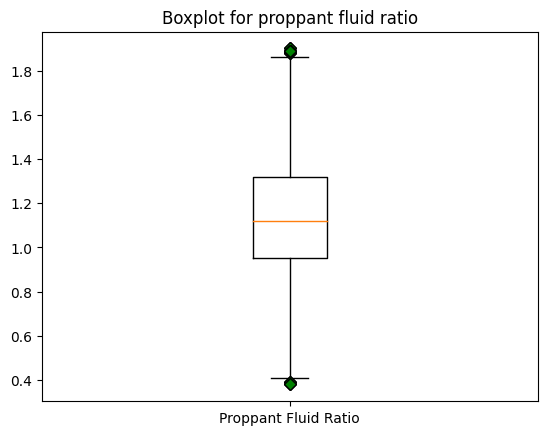

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot for proppant fluid ratio')
ax.boxplot(dataClean['proppant fluid ratio'], flierprops=green_diamond, labels=["Proppant Fluid Ratio"])

<Axes: >

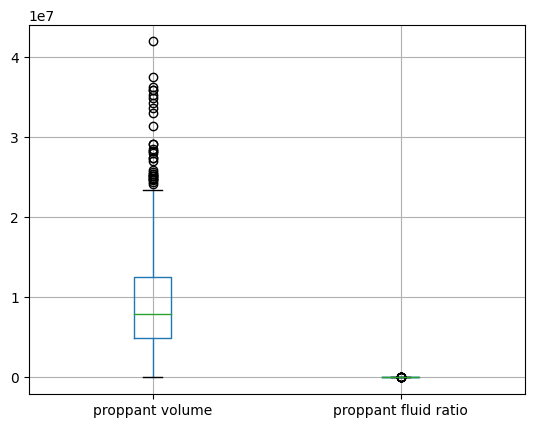

In [ ]:
columns_names = dataClean.columns.values
#print(columns_names)
dataClean.boxplot(list(columns_names[-3:-1]))


In [ ]:
# Remove outliers
for x in ['proppant volume']:
    # numpy.percentile() method to calculate the values of Q1 and Q3.
    q75,q25 = np.percentile(dataClean.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dataClean.loc[dataClean[x] < min,x] = np.nan
    dataClean.loc[dataClean[x] > max,x] = np.nan


In [ ]:
#dropping the null values using pandas.dataframe.dropna() function
dataClean = dataClean.dropna(axis = 0)
dataClean.isnull().sum()

azimuth                   0
md (ft)                   0
tvd (ft)                  0
month                     0
year                      0
footage lateral length    0
well spacing              0
porpoise deviation        0
porpoise count            0
shale footage             0
acoustic impedance        0
log permeability          0
porosity                  0
poisson ratio             0
water saturation          0
toc                       0
vcl                       0
p-velocity                0
s-velocity                0
youngs modulus            0
isip                      0
breakdown pressure        0
pump rate                 0
total number of stages    0
proppant volume           0
proppant fluid ratio      0
production                0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x786298dd85e0>,
 'caps': [<matplotlib.lines.Line2D at 0x786298dd8b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x786298dd8340>],
 'medians': [<matplotlib.lines.Line2D at 0x786298dd9060>],
 'fliers': [<matplotlib.lines.Line2D at 0x786298dd9300>],
 'means': []}

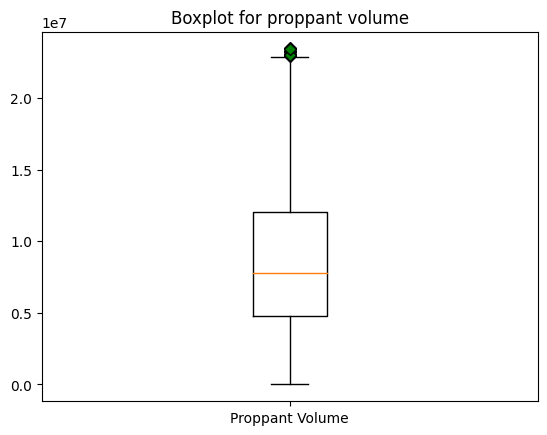

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot for proppant volume')
ax.boxplot(dataClean['proppant volume'], flierprops=green_diamond, labels=["Proppant Volume"])

<Axes: >

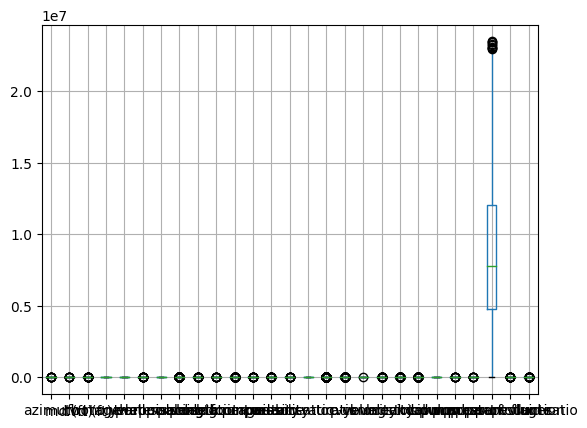

In [ ]:
# BoxPlot all variables
columns_names = dataClean.columns.values
dataClean.boxplot(list(columns_names))


# Correlation Analysis

In [ ]:
#Libraries

# Graphics
from matplotlib import style
import seaborn as sns
# Preprocessing
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.model_selection import train_test_split


In [ ]:
# Matplotlib Configuration
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


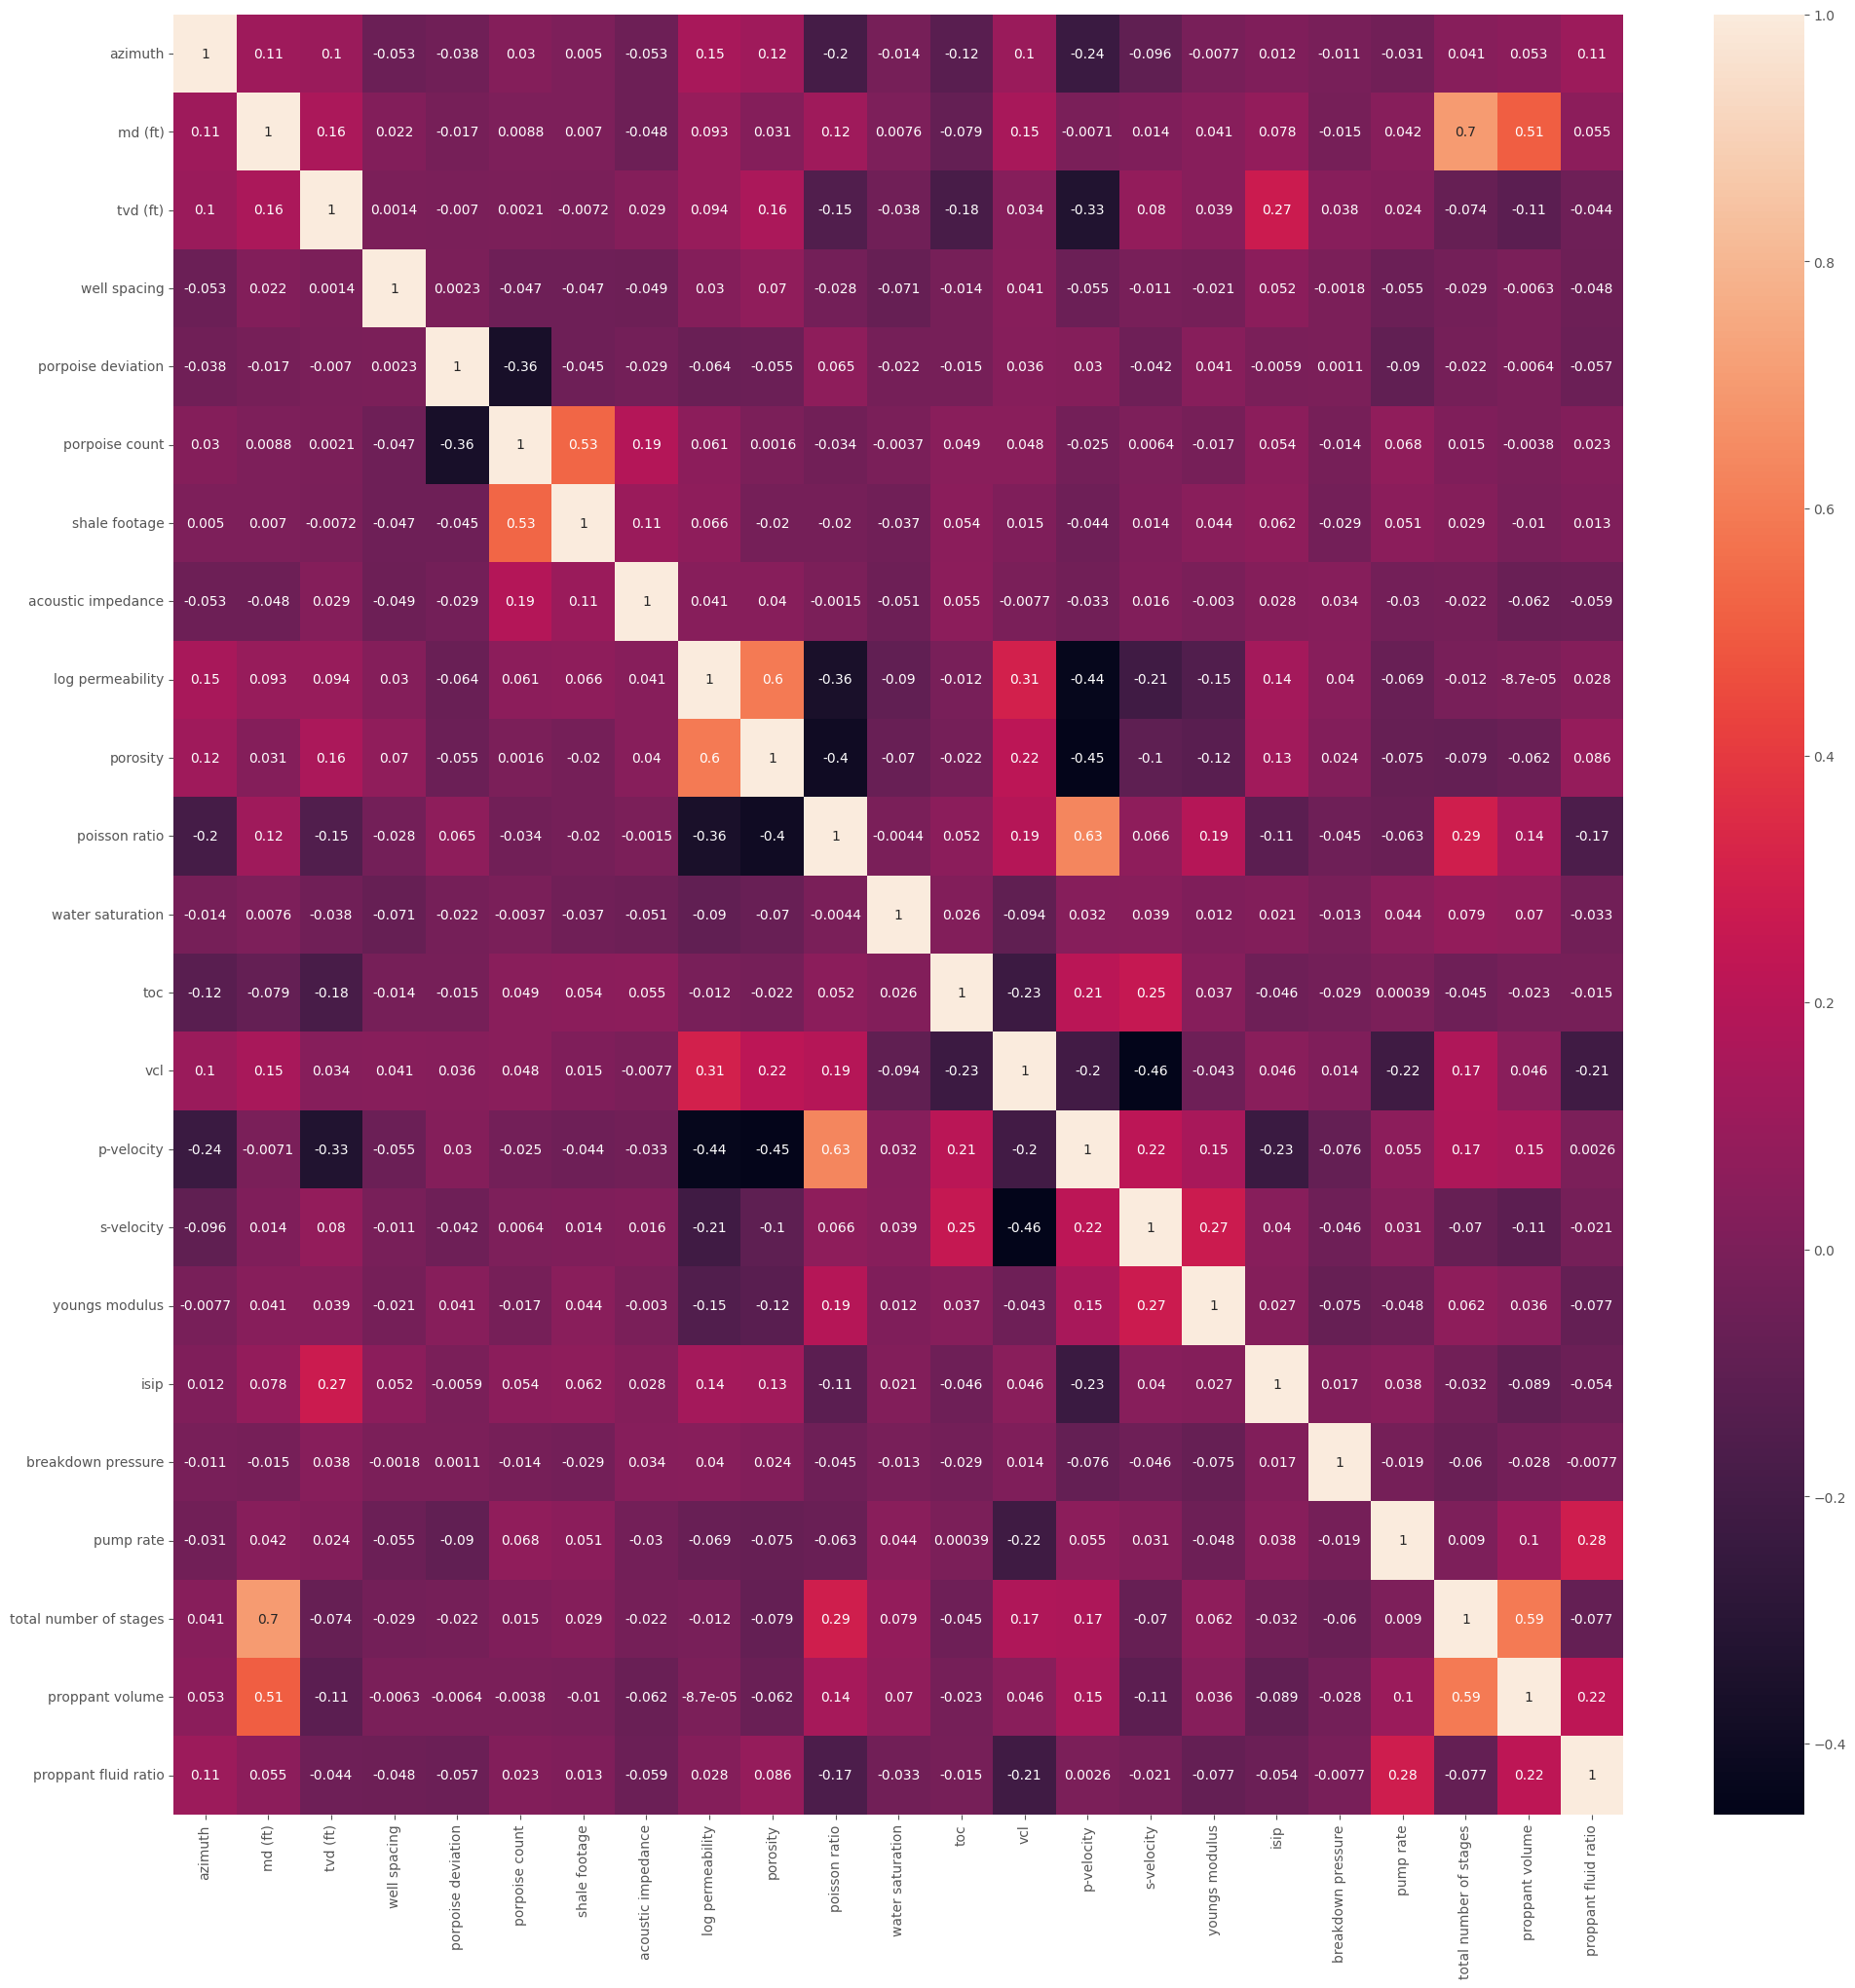

In [ ]:
# Correlation by Pearson Method
obj = dataClean['production']
ind = dataClean.drop(columns=['production','month','year','footage lateral length']).columns
corr_matrix = dataClean[ind].select_dtypes(include=['float64', 'int']).corr(method='pearson')

#corr_matrix.head(100)
#print(corr_matrix)
corr_matrix = dataClean[ind].corr()
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True);

IndexError: ignored

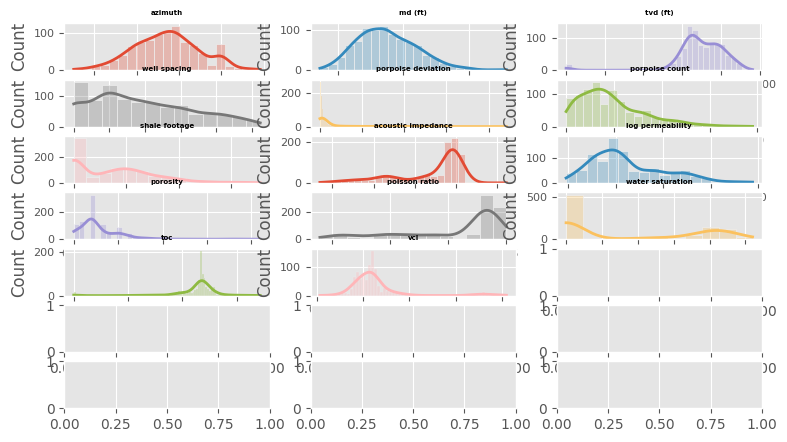

In [ ]:
# Numeric Distribution Variables

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(9, 5))
axes = axes.flat
columns_numeric = dataClean[ind].select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columns_numeric):
    sns.histplot(
        data    = dataClean[ind],
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 5, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Numeric Variables Distribution', fontsize = 10, fontweight = "bold");

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

X = dataClean.drop(['production','month','year'], axis=1)
y = dataClean['production']

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos y transformar el DataFrame
X_scaled = scaler.fit_transform(X)


# El resultado es un ndarray de NumPy, por lo que puedes convertirlo de nuevo a un DataFrame si es necesario
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
                                        X_new,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



Training score:  0.4126986406813308
{'copy_X': True, 'fit_intercept': True, 'positive': False}
Testing score:  0.34752612082585577


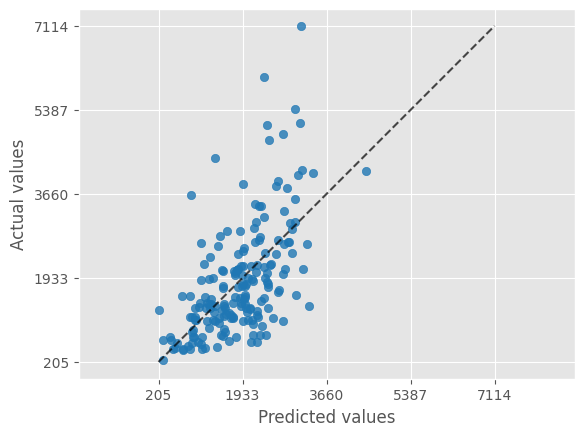

In [ ]:
from sklearn.model_selection import train_test_split

X = dataClean.drop(['production','month','year'], axis=1)
y = dataClean['production']

linear_grid = {"fit_intercept": [True, False],
            "copy_X": [True, False],
            "positive": [True, False]}

linear_model = LinearRegression()

# Configura la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=linear_model, param_grid=linear_grid, n_jobs=1, cv=None, scoring='r2', error_score=0)
# Ajusta el modelo a los datos de entrenamiento
grid_results= grid_search.fit(X_train, y_train)

final_linear_model= linear_model.set_params(**grid_results.best_params_)
final_linear_model.fit(X_train, y_train)
y_pred= final_linear_model.predict(X_test)
print('Training score: ',linear_model.score(X_train, y_train))
y_pred = linear_model.predict(X_test)

# Visualizamos los resultados
print(grid_results.best_params_)
print('Testing score: ', r2_score(y_test, y_pred))
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="actual_vs_predicted")

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Testing score:  0.5064866948848388


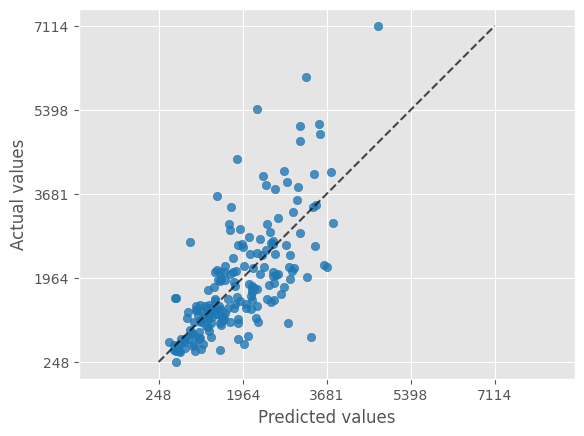

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.metrics import PredictionErrorDisplay

# Define una cuadrícula de hiperparámetros a explorar
knn_grid = {"n_neighbors": range(1,50),
            "weights": ['uniform', 'distance'],
            "metric": ['euclidean', 'manhattan', 'minkowski']}

# Crea un objeto KNeighborsRegressor
model = KNeighborsRegressor()

# Configura la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=knn_grid, n_jobs=1, cv=5, scoring='neg_mean_squared_error', error_score=0)
# Ajusta el modelo a los datos de entrenamiento
grid_results= grid_search.fit(X_train, y_train)

final_model= model.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred= final_model.predict(X_test)

# Visualizamos los resultados
print(grid_results.best_params_)
print('Testing score: ', r2_score(y_test, y_pred))
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="actual_vs_predicted")

R2 Score: 0.2620889020017425
Mejor combinación de hiperparámetros: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 11, 'min_samples_leaf': 9, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


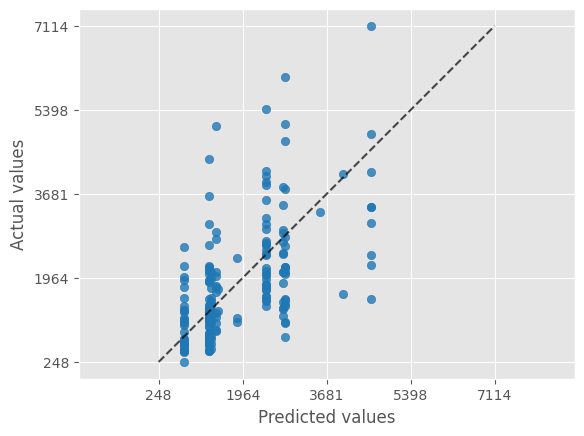

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

criterion = list(['squared_error', 'friedman_mse', 'absolute_error', 'poisson'])
splitter = list(['best', 'random'])
max_depth = list(range(1,5,1))
min_samples_split = list(range(2,10,1))
min_samples_leaf = list(range(1,10,1))
min_weight_fraction_leaf = [0.0,0.1,0.2,0.3,0.4]
max_features = list(range(10,15,1))

decisiontree = DecisionTreeRegressor()
DecisionTreeRegressor_grid =dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,max_features=max_features)

grid_search = GridSearchCV(estimator=decisiontree, param_grid=DecisionTreeRegressor_grid, n_jobs=-1,cv=5, scoring='neg_mean_squared_error')
grid_acc = grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"Mejor combinación de hiperparámetros: {grid_acc.best_params_}")


from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="actual_vs_predicted")

15
